# Introduction

Structured Query Language (SQL, usually pronounced S-Q-L or "sequel") is a programming language designed for managing data within a Database Management System (DBMS) — a software that stores, manipulates, and retrieves data efficiently.

In this course, we'll act as a data analyst for a fictional superstore. Our job is to transform raw data into information that is clear and easy-to-understand for our supervisor. We'll query data from the superstore database.

In [1]:
%load_ext sql

# Conect to a Superstore Database

In [2]:
%sql sqlite:///superstore.db

# 1) Understanding Data Types

Formally, we call these types of data storage classes. Even though datatypes and storage classes are different, it's common to refer to both of them as datatypes, which is what we'll do from now on.

SQLite uses the following terminology:

* **Integer** for integer numbers, like the values in the `quantity` field.

* Real for floating point values (or **floats**). Think of these as decimal numbers, like the values in the `sales` field.

* **Text** or strings for regular text values, like the values in the `order_date`, `order_id`, and `product_name` fields.

Note that there isn't a storage class for **date values**. The database stores these **as text**!

## Instructions

1) Write a query that includes all of the REAL number fields from the orders.

Interestingly, `postal_code` is not included in the list of numeric columns because it is a **TEXT** field.

United States postal codes can begin with 0 (i.e., 06057 is a postal code in Connecticut). If these values were stored as numbers, the zero would get dropped, leading to inaccurate data.

In [4]:
%%sql
SELECT sales, discount, profit
    from orders
LIMIT 5;

 * sqlite:///superstore.db
Done.


sales,discount,profit
261.96,0.0,41.9136
731.94,0.0,219.582
14.62,0.0,6.8714
957.5775,0.45,-383.031
22.368,0.2,2.5164


# 2) Table Information with PRAGMA

what if a **TEXT field** is incorrectly assigned as INTEGER?

Fortunately, SQLite provides a way to retrieve information about the columns in a table:

```SQL
PRAGMA table_info(returns);
```

Unlike a `SELECT` statement, which retrieves data from a table, `PRAGMA table_info() `retrieves **metadata**, which is information about a table.

When we run this command, it returns one row for each of the table's columns with information, such as its name and data type.

In [5]:
%%sql
PRAGMA table_info(returns);

 * sqlite:///superstore.db
Done.


cid,name,type,notnull,dflt_value,pk
0,returned,TEXT,0,None,0
1,order_date,TEXT,0,None,0
2,order_id,TEXT,0,None,0
3,customer_id,TEXT,0,None,0
4,customer_name,TEXT,0,None,0


## Instructions

Your supervisor wants you to preview the data types for the orders table to verify that they are correctly assigned.

1) Write a query that displays the data types of the orders table.

In [7]:
%%sql
PRAGMA table_info(orders);

 * sqlite:///superstore.db
Done.


cid,name,type,notnull,dflt_value,pk
0,order_id,TEXT,0,None,0
1,order_date,TEXT,0,None,0
2,ship_date,TEXT,0,None,0
3,ship_mode,TEXT,0,None,0
4,customer_id,TEXT,0,None,0
5,customer_name,TEXT,0,None,0
6,segment,TEXT,0,None,0
7,country,TEXT,0,None,0
8,city,TEXT,0,None,0
9,state,TEXT,0,None,0


# 3) Operating on Numeric Columns

A typical task for data analysts is to derive new columns from existing columns by using **arithmetic operations**

We can write a query to pull the order_id, sales amount and multiply sales by 7% to estimate sales tax:

```sql
SELECT order_id, 
       sales, 
       sales * .07
  FROM orders;
```

Looking at our column names, we can see that the calculated field is currently called `sales * .07`, which isn't very readable. Let's rewrite our query with an alias:

In [10]:
%%sql
SELECT order_id, 
       sales, 
       sales * .07 AS sales_tax
  FROM orders
Limit 5;

 * sqlite:///superstore.db
Done.


order_id,sales,sales_tax
CA-2016-152156,261.96,18.3372
CA-2016-152156,731.94,51.23580000000001
CA-2016-138688,14.62,1.0234
US-2015-108966,957.5775,67.03042500000001
US-2015-108966,22.368,1.56576


## Instructions

Your manager has requested you find the **profit margin** on all orders from the orders table.

1) Write a query that includes `order_id`, `sales`, `profit`, and profit margin (**profit divided by sales**).

1) Alias the calculated field as `profit_margin`.

1) Only display 8 rows.

In [11]:
%%sql
SELECT order_id,
         sales,
         profit,
         profit/sales as profit_margin
      FROM orders
      
        LIMIT 8;

 * sqlite:///superstore.db
Done.


order_id,sales,profit,profit_margin
CA-2016-152156,261.96,41.9136,0.16000000000000003
CA-2016-152156,731.94,219.582,0.3
CA-2016-138688,14.62,6.8714,0.47000000000000003
US-2015-108966,957.5775,-383.031,-0.4
US-2015-108966,22.368,2.5164,0.1125
CA-2014-115812,48.86,14.1694,0.29
CA-2014-115812,7.28,1.9656,0.27
CA-2014-115812,907.152,90.7152,0.09999999999999999


# 4) Integer Division

In many programming languages, using the symbol `/` will perform integer division. **Integer division** discards the fractional part.

We can handle this by having any of the parts be a float. To change the datatype of a `column/value` we can use the `CAST` function, like so: 
`CAST(column/value AS new_datatype)`

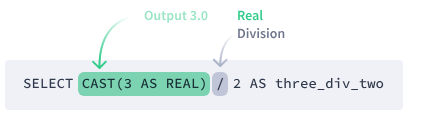

In [12]:
%%sql
SELECT 3/2 AS three_div_two;

 * sqlite:///superstore.db
Done.


three_div_two
1


In [13]:
%%sql
SELECT CAST(3 AS REAL)/2 AS three_div_two;

 * sqlite:///superstore.db
Done.


three_div_two
1.5


## Instructions

You have been asked to write a query using the `orders` table that helps identify whether customers are more likely to purchase an even number of an item or an odd number to help with ordering inventory. You can do this by dividing the `quantity` by 2 to help separate results that are whole numbers vs. decimal numbers.

1) Write a query that includes:

    * `product_id`
    
    * `quantity`
    
    * a calculated field that **divides** `quantity` by 2 (remember to CAST your integer to a real number)

2) Alias the calculated field as `even_or_odd`

3) Limit your results to 5 rows

In [14]:
%%sql
select product_id,
quantity,
CAST(quantity as REAL) / 2 AS even_or_odd
from orders
LIMIT 5;

 * sqlite:///superstore.db
Done.


product_id,quantity,even_or_odd
FUR-BO-10001798,2,1.0
FUR-CH-10000454,3,1.5
OFF-LA-10000240,2,1.0
FUR-TA-10000577,5,2.5
OFF-ST-10000760,2,1.0


# 5) Functions on Fields: ROUND()

On the previous exercises we saw that the values for `sales` and our calculated field, `sales_tax`, had too many digits after the decimal point to represent dollars. Here's a reminder of what that query and output looked like:


In [16]:
%%sql
SELECT order_id, 
       sales, 
       sales * .07 AS sales_tax
  FROM orders
  LIMIT 5;

 * sqlite:///superstore.db
Done.


order_id,sales,sales_tax
CA-2016-152156,261.96,18.3372
CA-2016-152156,731.94,51.23580000000001
CA-2016-138688,14.62,1.0234
US-2015-108966,957.5775,67.03042500000001
US-2015-108966,22.368,1.56576


Let's clean up our query using `ROUND()`, which rounds numerical values to a specified number of decimal places. This function can be helpful when we want to display or store values with a certain level of precision or when we need to perform calculations with rounded values.

this function requires us to enter two arguments, so let's take a look at the syntax:

```SQL
ROUND(value, decimal_places)
```

1. **value**: the number we want to round

1. **decimal_places**: the number of decimal places to round the value to (Note: if this argument is omitted, the function will round to the nearest whole number.)

We'll use separate `ROUND()` functions on `sales` and our calculated field, `sales_tax`, and give each an alias to make the names more readable:

In [18]:
%%sql
SELECT order_id, 
       ROUND(sales, 2) AS rounded_sales, 
       ROUND(sales * .07, 2) AS rounded_sales_tax
  FROM orders
  limit 5;

 * sqlite:///superstore.db
Done.


order_id,rounded_sales,rounded_sales_tax
CA-2016-152156,261.96,18.34
CA-2016-152156,731.94,51.24
CA-2016-138688,14.62,1.02
US-2015-108966,957.58,67.03
US-2015-108966,22.37,1.57


## Instructions

Many customers buy multiples of the same item, which makes it difficult to see how much each item costs.

1. Write a query from the `orders` table that includes `order_id`, `sales`, and `quantity`.

1. Create a field `price_per_unit` that divides `sales` by `quantity`.

1. Round `price_per_unit` to two decimal places.

1. Only display 10 rows.

In [19]:
%%sql
SELECT order_id,
sales,
quantity,
round(sales/quantity,2) as price_per_unit

FROM orders
LIMIT 10;


 * sqlite:///superstore.db
Done.


order_id,sales,quantity,price_per_unit
CA-2016-152156,261.96,2,130.98
CA-2016-152156,731.94,3,243.98
CA-2016-138688,14.62,2,7.31
US-2015-108966,957.5775,5,191.52
US-2015-108966,22.368,2,11.18
CA-2014-115812,48.86,7,6.98
CA-2014-115812,7.28,4,1.82
CA-2014-115812,907.152,6,151.19
CA-2014-115812,18.504,3,6.17
CA-2014-115812,114.9,5,22.98


# 6) Functions on Fields: UPPER() and LOWER()

SQL also provides several functions that help transform text data. 

* `UPPER()`, which converts all characters in a given text string to **uppercase**

* `LOWER()`, which converts all characters in a given text string to **lowercase**

These functions have many uses, but two of the most common uses are:

* **Data normalization:** When importing data from various sources, we may encounter inconsistent letter casing. We can use UPPER() or LOWER() to normalize the text data, making it **uniform** and easier to analyze.

* **Display formatting:** We can use UPPER() or LOWER() to format the output of our query for improved readability or to meet specific display requirements.

For example, perhaps we wanted to convert the ship_mode column to all uppercase for formatting purposes. This is possible with the UPPER() function:

In [20]:
%%sql
SELECT ship_mode AS original_ship_mode,
       UPPER(ship_mode) AS SHIP_MODE
  FROM orders
Limit 5;

 * sqlite:///superstore.db
Done.


original_ship_mode,SHIP_MODE
Second Class,SECOND CLASS
Second Class,SECOND CLASS
Second Class,SECOND CLASS
Standard Class,STANDARD CLASS
Standard Class,STANDARD CLASS


## Instructions

Customers enter their own names when they purchase items from the superstore online, which means some customer names have inconsistent capitalization formatting.

1. Write a query that converts `customer_name` from the `orders` table to all **lowercase letters**.

1. Alias the newly formatted names as **customer_name_lower**.


In [22]:
%%sql
SELECT LOWER(customer_name) AS customer_name_lower
FROM orders
LIMIT 5;

 * sqlite:///superstore.db
Done.


customer_name_lower
claire gute
claire gute
darrin van huff
sean o'donnell
sean o'donnell


## 7) Concatenating Fields

It's also possible to concatenate, or combine, multiple pieces of text together.

Perhaps we'd like to put the city and state columns together like this: **Henderson, Kentucky**.

SQLite uses the concatenate operator (`||`) to join two strings into one.

In [24]:
%%sql
SELECT city || ", " || state AS "location"
  FROM orders
LIMIT 5;

 * sqlite:///superstore.db
Done.


location
"Henderson, Kentucky"
"Henderson, Kentucky"
"Los Angeles, California"
"Fort Lauderdale, Florida"
"Fort Lauderdale, Florida"


## Instructions

Every superstore location is named after the city where it's located. For example, the store in Los Angeles, California is called "Superstore Los Angeles."

1. Write a query that includes `order_id`, `region`, and `state`.

1. Create a new column called `local_store` that concatenates the word "**Superstore**" with city. There should be one space between the word 
"Superstore" and the city name (i.e. "Superstore Dallas")

1. Limit your results to 10 rows.

In [25]:
%%sql
SELECT order_id,
region,
state,
"Superstore "|| city as  "local_store"
FROM orders
LIMIT 10

 * sqlite:///superstore.db
Done.


order_id,region,state,local_store
CA-2016-152156,South,Kentucky,Superstore Henderson
CA-2016-152156,South,Kentucky,Superstore Henderson
CA-2016-138688,West,California,Superstore Los Angeles
US-2015-108966,South,Florida,Superstore Fort Lauderdale
US-2015-108966,South,Florida,Superstore Fort Lauderdale
CA-2014-115812,West,California,Superstore Los Angeles
CA-2014-115812,West,California,Superstore Los Angeles
CA-2014-115812,West,California,Superstore Los Angeles
CA-2014-115812,West,California,Superstore Los Angeles
CA-2014-115812,West,California,Superstore Los Angeles


# 8) Constant Values

Sometimes we'll want to add a column to our query that shows a constant number for every record. We can do this by specifying the number in the SELECT clause and adding an alias for readability (note that the alias isn't required).

e.g. We can see that including `2 AS promotional_discount` creates a new column with 2's filled in for every value.



In [26]:
%%sql

SELECT sales, 2 AS promotional_discount
  FROM orders
LIMIT 5;

 * sqlite:///superstore.db
Done.


sales,promotional_discount
261.96,2
731.94,2
14.62,2
957.5775,2
22.368,2


## Instructions

You've been asked to create a table that shows the salary for all the regional managers.

1. Write a query from `managers` that includes all fields.

1. Create a new column with the manager salary amount: $51,000. Alias it as `salary`.



In [27]:
%%sql
select *, 
51000 as salary

FROM managers
Limit 5;

 * sqlite:///superstore.db
Done.


person,region,salary
Anna Andreadi,West,51000
Chuck Magee,East,51000
Kelly Williams,Central,51000
Cassandra Brandow,South,51000


# 9) Challenge: Tying it All Together

We've been asked to write a query that lists the address and **total sales** amount for each order. The total sales amount includes `sales` and two other amounts: **tax** and **shipping cost**, which are not currently included in the orders table.

We now know everything we need in order to write this query. It's by-far the most challenging query we've written, so don't be discouraged if it takes a few extra attempts to get it right. You've got this!

## Instructions

1. Create a field called `address` that combines `city`, `state`, and `postal_code` in the following format: **city, state 99999**

1. Calculate a ``total_cost`` field cost as sales, shipping, and tax. (Shipping costs 4.99 and tax is calculated at 7%). Round the field to two decimal places.

1. Create a field called `tax` that finds 7% of sales, rounded to two decimal places.

1. Create a field called `shipping_cost` with a value of 4.99.

1. For readability, your final query should include the following fields:

    * address

    * sales

    * tax

    * shipping_cost

    * total_cost

1. Limit your results to 10 rows.

In [28]:
%%sql
SELECT city ||", " ||  state ||" " || postal_code as address,
sales,
ROUND(sales+sales*0.07+4.99,2) as total_cost,
round(sales*0.07,2) as tax,
4.99 as shipping_cost

from orders
LIMIT 10;

 * sqlite:///superstore.db
Done.


address,sales,total_cost,tax,shipping_cost
"Henderson, Kentucky 42420",261.96,285.29,18.34,4.99
"Henderson, Kentucky 42420",731.94,788.17,51.24,4.99
"Los Angeles, California 90036",14.62,20.63,1.02,4.99
"Fort Lauderdale, Florida 33311",957.5775,1029.6,67.03,4.99
"Fort Lauderdale, Florida 33311",22.368,28.92,1.57,4.99
"Los Angeles, California 90032",48.86,57.27,3.42,4.99
"Los Angeles, California 90032",7.28,12.78,0.51,4.99
"Los Angeles, California 90032",907.152,975.64,63.5,4.99
"Los Angeles, California 90032",18.504,24.79,1.3,4.99
"Los Angeles, California 90032",114.9,127.93,8.04,4.99
